* A pipeline to which you feed an mri image and
 spits out muscle predictions and lever arms.

In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
from mri_project.custom_imports import *
import mri_project.muscle_detector as md
import mri_project.contour_ops as cntop
from mri_project import pipeline
import mri_project.utility as ut
from mri_project.notebooks import n2021_01_30_connor_lever_arms as nb

In [45]:
m9 = tf.keras.models.load_model("../data/models/new_era.v02.9muscles.h5")
m11 = tf.keras.models.load_model("../data/models/new_era.v03.11muscles.h5")

In [116]:
root = "/home/bzr0014/git/idea_mri_project/data/mri_analysis_behnam/"
files = ut.get_all_images(root, extension='png')
files = [file for file in files if 'raw' in file]
file = np.random.choice(files)

In [117]:
detector = md.MuscleDetector(file, file)

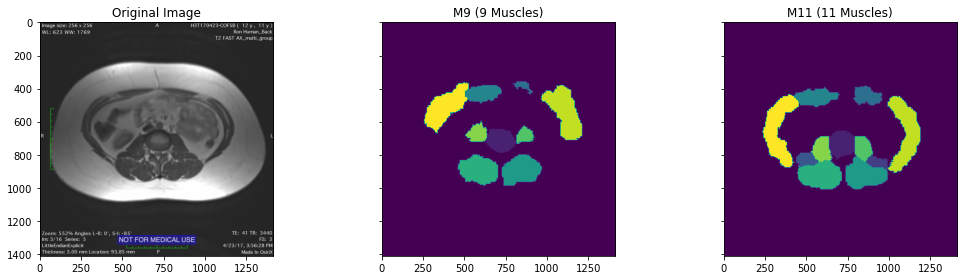

In [118]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].imshow(detector.raw_image)
axes[0].set_title('Original Image')
axes[1].imshow(detector.predict(m9))
axes[1].set_title('M9 (9 Muscles)')
axes[1].set_yticklabels([])
axes[2].imshow(detector.predict(m11))
axes[2].set_title('M11 (11 Muscles)')
axes[2].imshow(detector.predict(m11))
axes[2].set_yticklabels([])
plt.tight_layout()

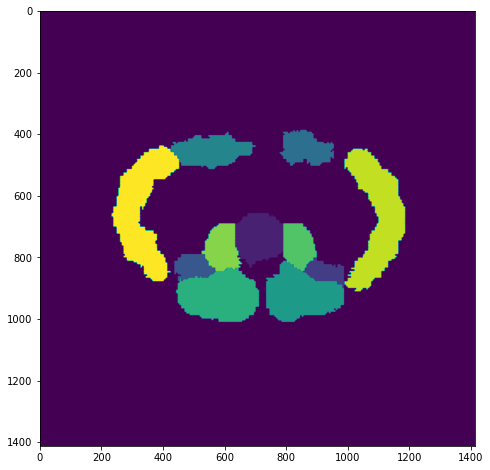

In [119]:
plt.imshow(detector.predicted)

In [122]:
detector.get_predicted_contours(45)

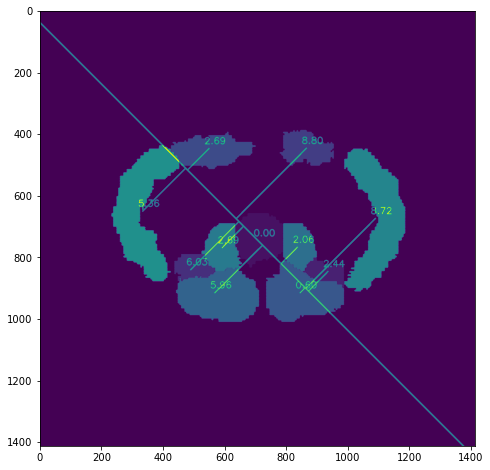

In [123]:
plt.imshow(detector.predicted_lever_arm_images[45])

# Appendix